# Roots of the Derivatives of Random Polynomials

In [1]:
import numpy as np
np.random.seed(25)
from itertools import product
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation,rc
from IPython.display import HTML
import importlib
import scipy.linalg as la

%matplotlib inline

In [2]:
from polyrand import experiments as exp
importlib.reload(exp)

<module 'polyrand.experiments' from '/Users/derekmiller/Desktop/D_stuff/polyrand/polyrand/experiments.py'>

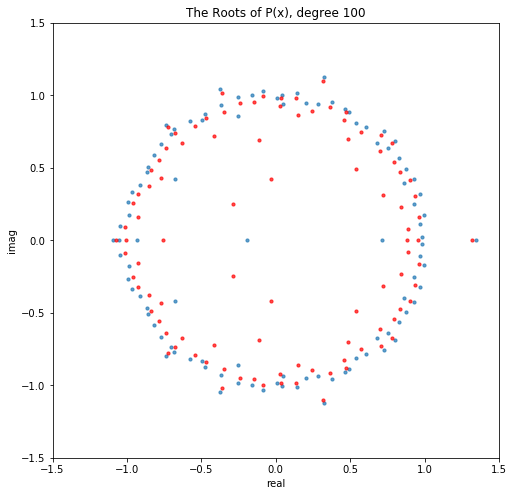

In [3]:
params = [('normal',[0,1],{'size':100})]
coeffs = exp.random_coeffs(params)
exp.poly_deriv_roots(coeffs,dx=2)

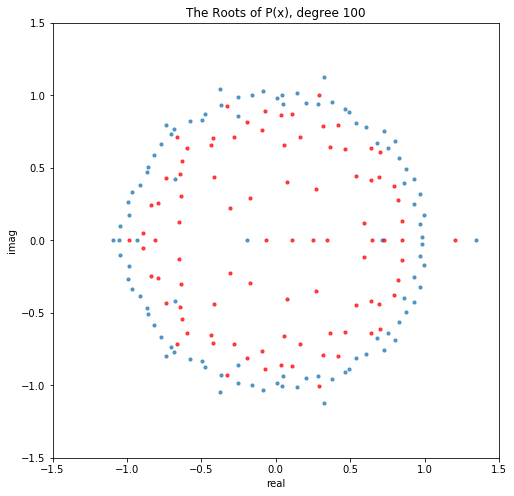

In [4]:
exp.poly_deriv_roots(coeffs,dx=10)

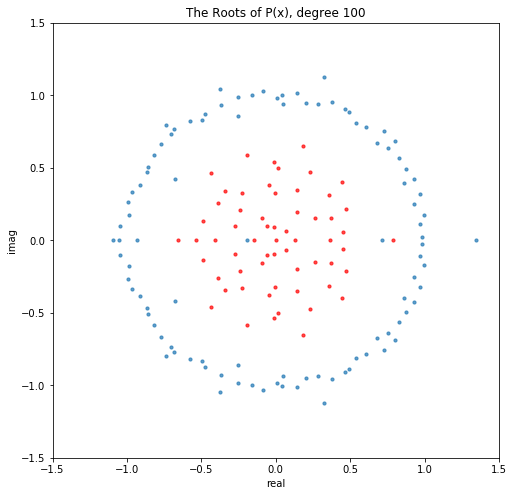

In [5]:
exp.poly_deriv_roots(coeffs,dx=40)

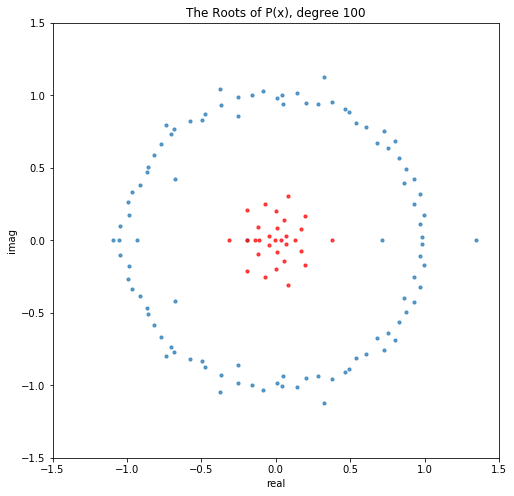

In [6]:
exp.poly_deriv_roots(coeffs,dx=70)

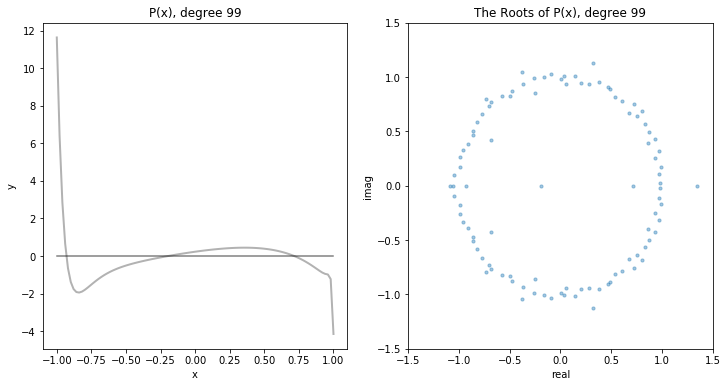

In [7]:
exp.poly_roots(coeffs)

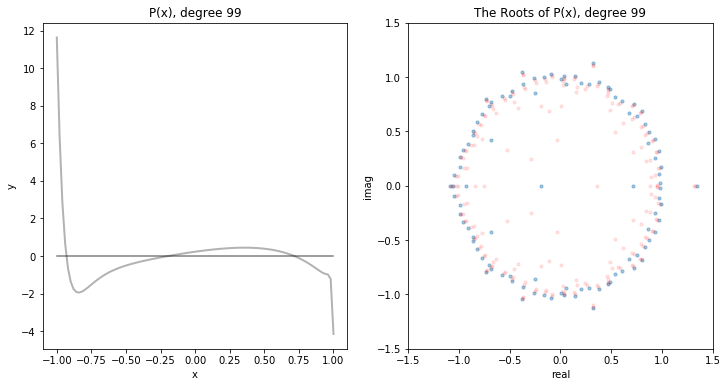

In [8]:
exp.poly_roots(coeffs,dx=2,basis='power',plot_range=1)

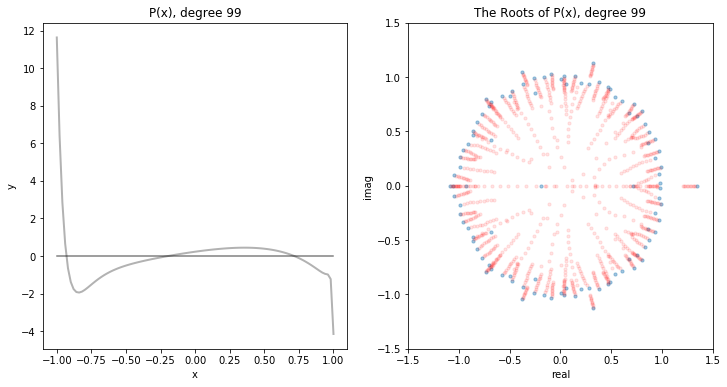

In [9]:
exp.poly_roots(coeffs,dx=10)

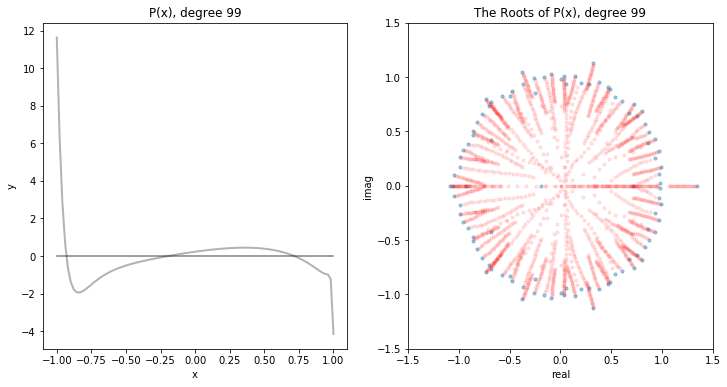

In [10]:
exp.poly_roots(coeffs,dx=20)

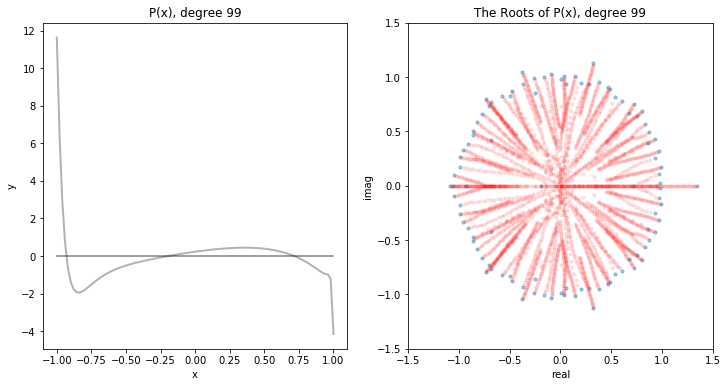

In [11]:
exp.poly_roots(coeffs,dx=40)

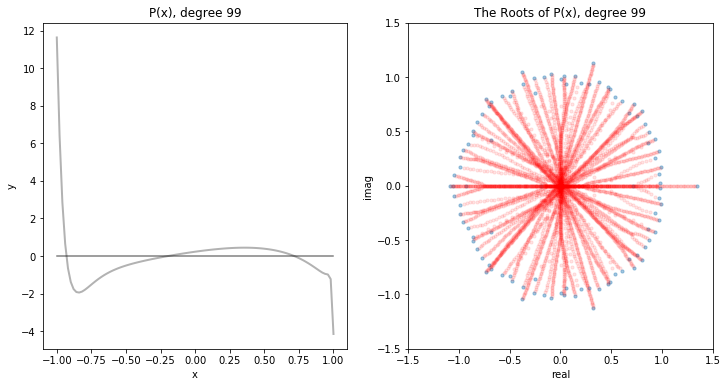

In [12]:
exp.poly_roots(coeffs,dx=100)

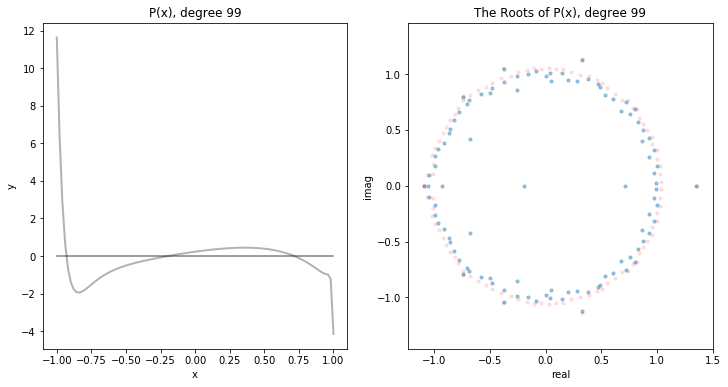

In [13]:
exp.poly_roots(coeffs,dx=-1,plot_range=1,correction=True)

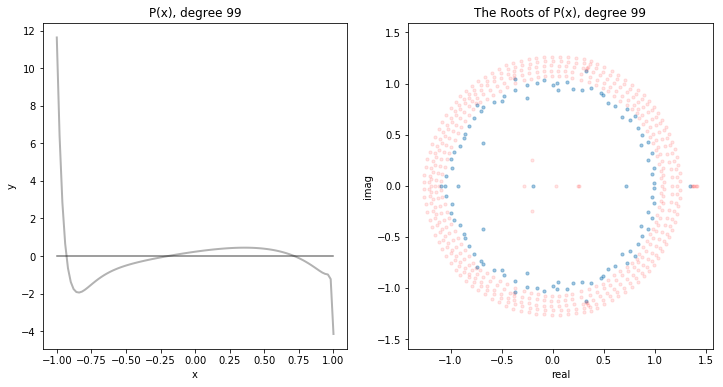

In [14]:
exp.poly_roots(coeffs,dx=-5,correction=True)

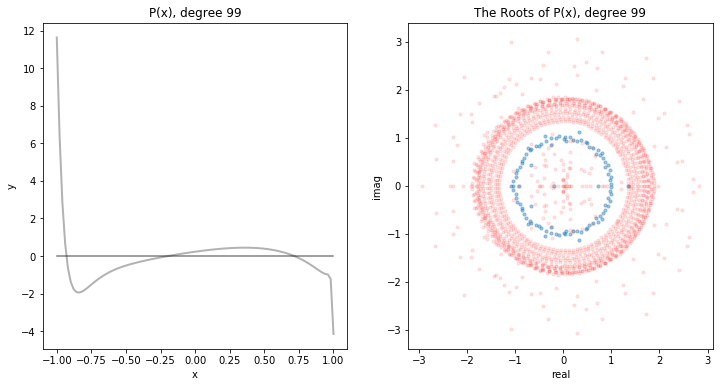

In [15]:
exp.poly_roots(coeffs,dx=-15,correction=True)

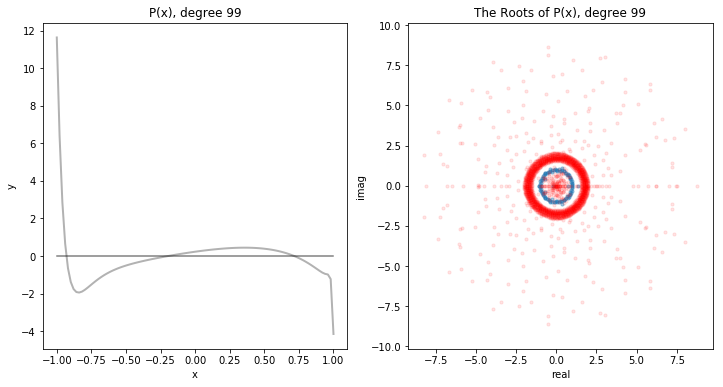

In [16]:
exp.poly_roots(coeffs,dx=-20,correction=True)

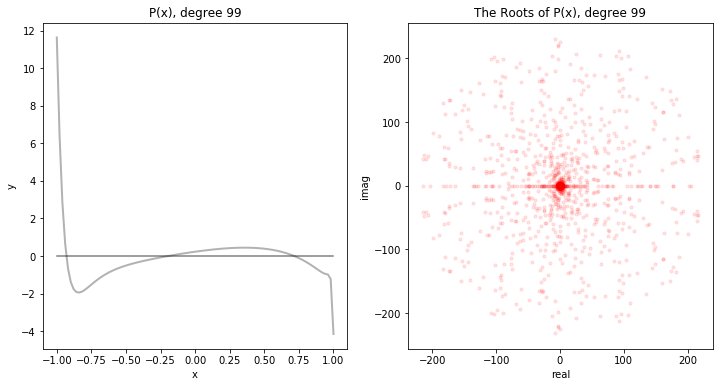

In [17]:
exp.poly_roots(coeffs,dx=-40,correction=True)

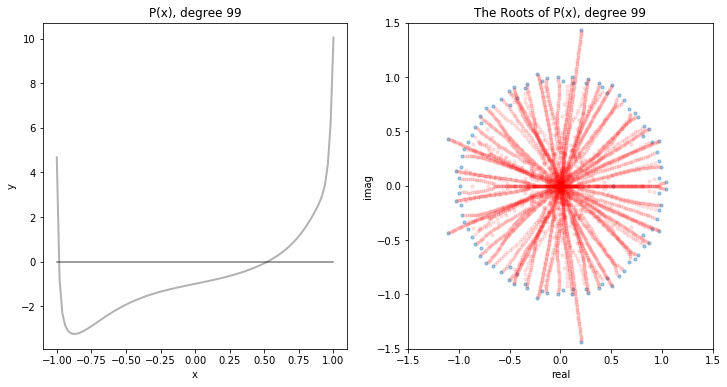

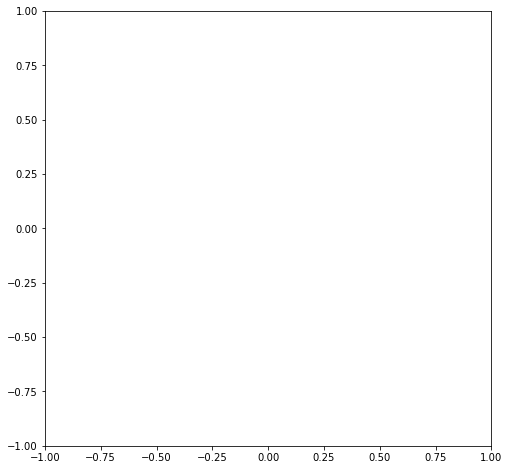

In [18]:
params = [('normal',[0,1],{'size':100})]
coeffs = exp.random_coeffs(params)

# try also with chebyshev basis

X,Y,dX,dY = exp.poly_roots(coeffs,basis='power',dx=100,return_values=True)

fig = plt.figure(figsize=(8,8))
ax = plt.gca()

plt.xlim((-1,1))
plt.ylim((-1,1))

line, = plt.plot([], [], 'ro', alpha=.4)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    x = dX[i]
    y = dY[i]
    line.set_data(x, y)
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=100, interval=50)#, blit=True)

HTML(anim.to_html5_video())

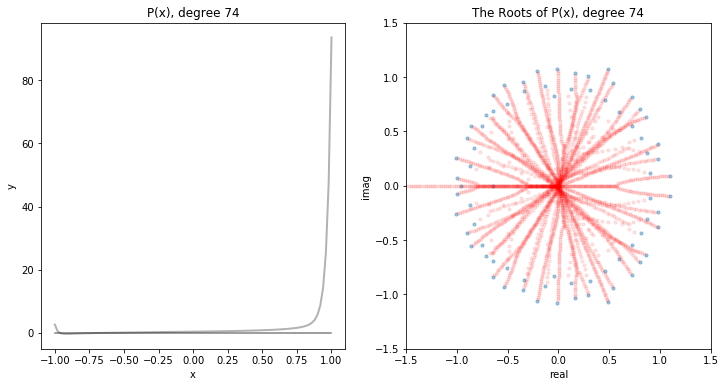

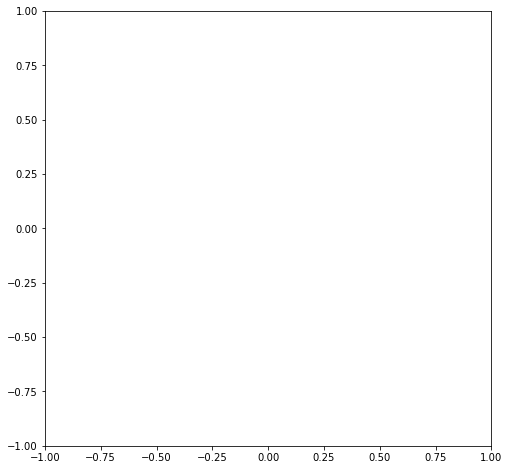

In [19]:
params = [('beta',[.5,.5],{'size':25}), ('gamma',[2,2],{'size':25}), ('normal',[0,1],{'size':25})]
coeffs = exp.random_coeffs(params)

# try also with chebyshev basis

X,Y,dX,dY = exp.poly_roots(coeffs,basis='power',dx=100,return_values=True)

fig = plt.figure(figsize=(8,8))
ax = plt.gca()

plt.xlim((-1,1))
plt.ylim((-1,1))

line, = plt.plot([], [], 'ro', alpha=.4)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    x = dX[i]
    y = dY[i]
    line.set_data(x, y)
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=100, interval=50)#, blit=True)

HTML(anim.to_html5_video())

The reason why the roots of random polynomials lie on the unit circle has to do with orthogonality. The companion matrix of a random polynomial is an almost orthogonal matrix as the degree gets large.

In [20]:
A = np.random.randn(10000).reshape(100,100)
Q,R = np.linalg.qr(A)
Qew,Qev = np.linalg.eig(Q)
U,S,V = np.linalg.svd(A)
Aew,Aev = np.linalg.eig(A)

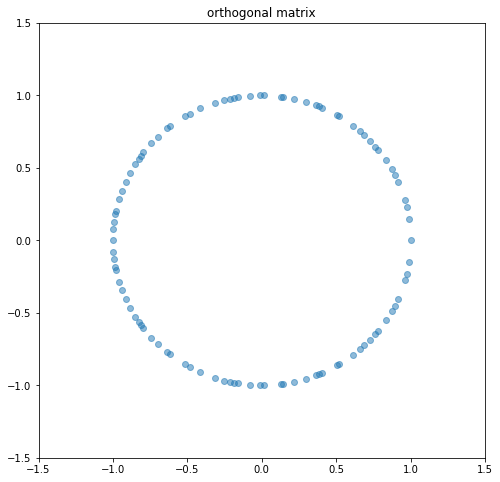

In [21]:
plt.figure(figsize=(8,8))
plt.scatter(Qew.real,Qew.imag,alpha=.5)
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.title("orthogonal matrix")
plt.show()